In [61]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns

log_path = "..\\..\\logdata\\Experiment_1_2024-10-05_19_05_33_243222"
os.path.exists(log_path)

True

Create a target folder for saving the figures

In [62]:
targ_dir = os.path.join(log_path, "Analysis")
if not os.path.exists(targ_dir):
    os.mkdir(targ_dir)

Import dataset

In [64]:
test_df = pd.read_csv(os.path.join(log_path, "quantum_base_encoding_1.csv"), index_col=False)

Filter out the last iterations from the dataset

In [65]:
result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)

Plotting the performance graph for the two objectives

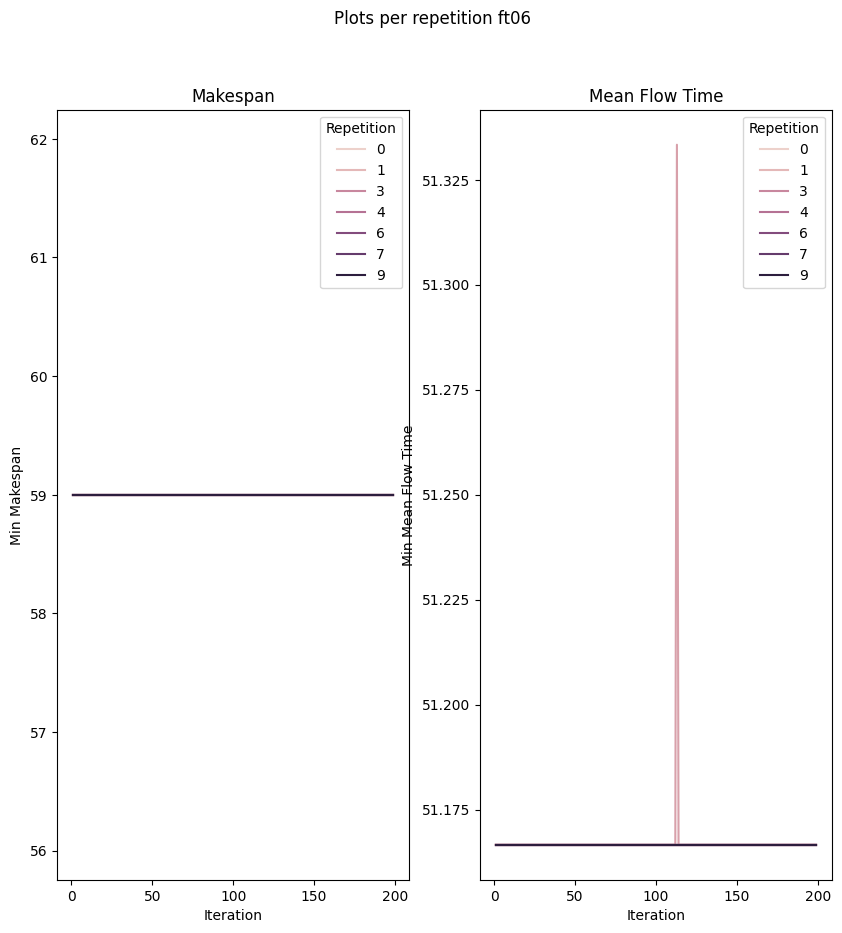

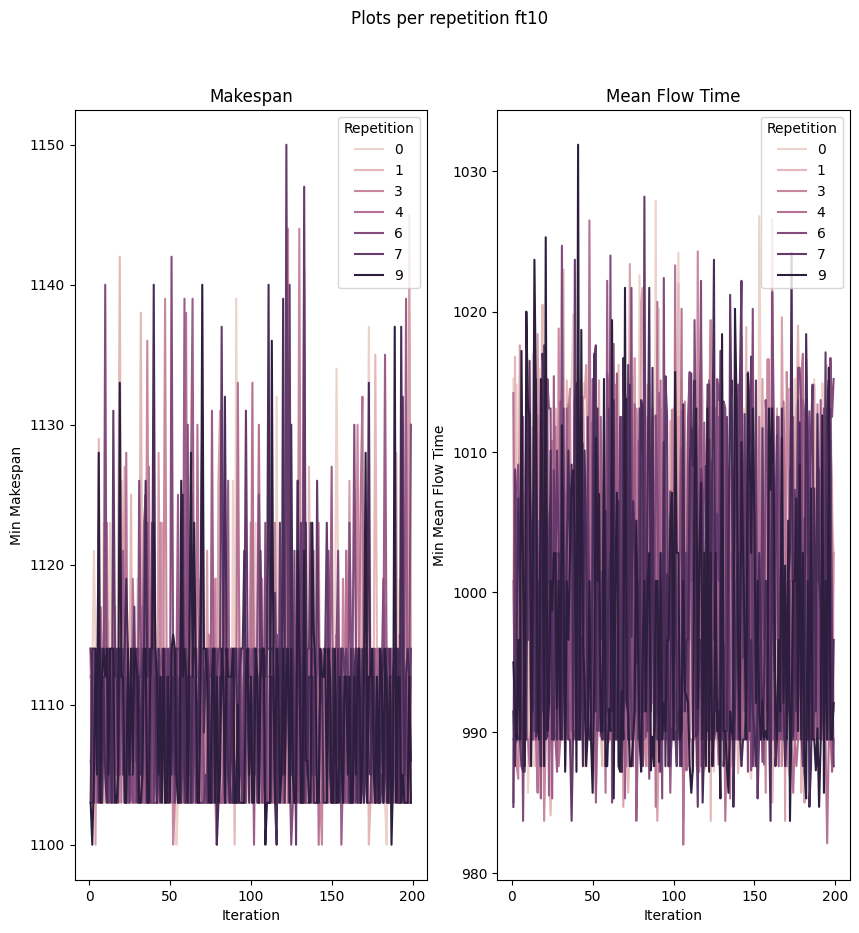

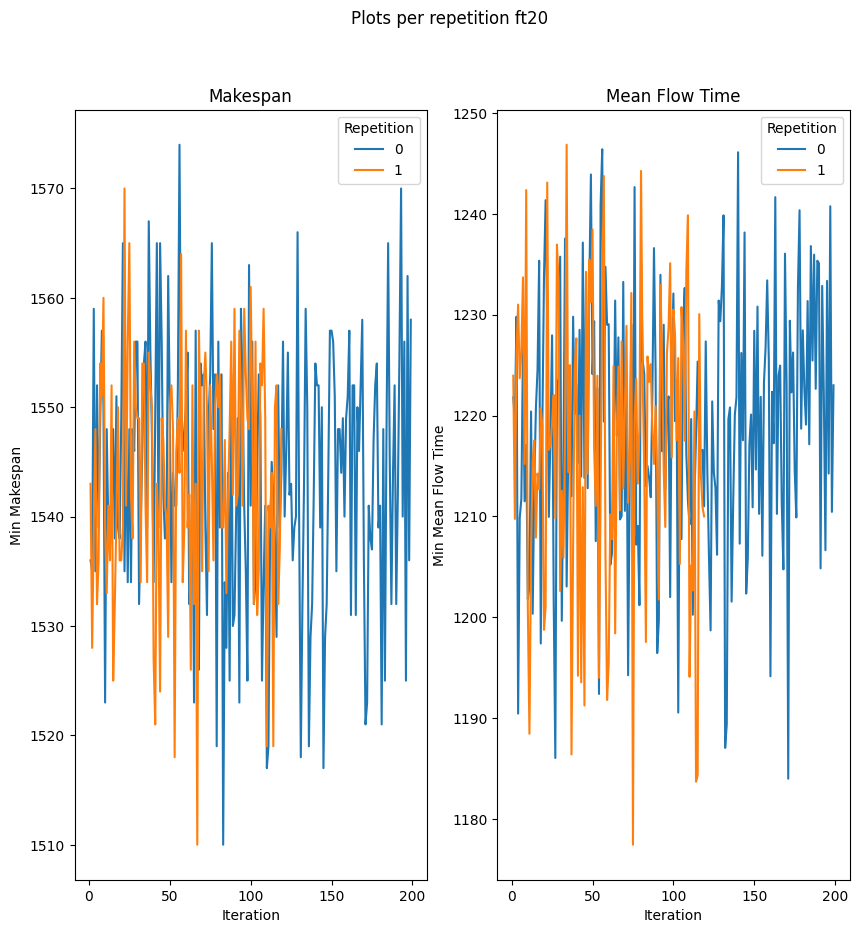

In [66]:
for problem in test_df["Problem"].unique():
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    plt.suptitle(f"Plots per repetition {str(problem)}")
    ax[0].set_title("Makespan")
    ax[1].set_title("Mean Flow Time")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Makespan", hue="Repetition", ax=ax[0])#, style="Candidate")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Mean Flow Time", hue="Repetition", ax=ax[1])
    plt.show()

Aggregate over repetitions to get average values and standard deviations for each metric at each iteration.

In [47]:
agg_columns = ["Time", "Min Makespan", "Max Makespan", "Avg Makespan", "Min Mean Flow Time", "Max Mean Flow Time", "Avg Mean Flow Time", "Spread", "N Fronts"]
agg_columns = list(test_df.columns[4:])
avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})
avg_df

C:\Users\b-mor\AppData\Local\Temp\ipykernel_20784\4239381174.py:3: FutureWarning: The provided callable <function std at 0x0000022F7FAE7550> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})


Time             \
                                                  mean        std   
Problem Candidate                 Iteration                         
ft06    quantum_position_encoding 1            0.02810   0.005400   
                                  2            0.37520   0.017591   
                                  3            0.74059   0.030124   
                                  4            1.11290   0.045116   
                                  5            1.49972   0.048706   
...                                                ...        ...   
ft20    quantum_position_encoding 195        341.78871  15.375447   
                                  196        343.59637  15.447879   
                                  197        345.40280  15.499150   
                                  198        347.19361  15.580519   
                                  199        348.99710  15.690141   

                                            Min Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1                 58.2   0.788811   
                                  2                 58.4   0.516398   
                                  3                 58.4   0.699206   
                                  4                 58.1   0.567646   
                                  5                 58.3   0.674949   
...                                                  ...        ...   
ft20    quantum_position_encoding 195             1349.9  33.679700   
                                  196             1361.0  17.975292   
                                  197             1370.5  22.480856   
                                  198             1374.0  17.707500   
                                  199             1374.5  24.148844   

                                            Max Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1                 66.9   7.109462   
                                  2                 64.0   5.537749   
                                  3                 62.5   6.023104   
                                  4                 60.6   3.470511   
                                  5                 61.7   4.029061   
...                                                  ...        ...   
ft20    quantum_position_encoding 195             1384.9  54.267752   
                                  196             1393.2  37.222454   
                                  197             1398.4  46.342205   
                                  198             1437.9  77.408656   
                                  199             1411.0  40.786708   

                                            Avg Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1            61.350000   2.454147   
                                  2            61.003333   2.948130   
                                  3            60.033333   2.411137   
                                  4            59.333333   1.758577   
                                  5            59.741667   1.630369   
...                                                  ...        ...   
ft20    quantum_position_encoding 195        1367.903333  38.671898   
                                  196        1378.300000  28.196051   
                                  197        1384.143333  30.692871   
                                  198        1400.016667  35.517575   
                                  199        1392.333333  27.583767   

                                            Min Mean Flow Time             \
                     

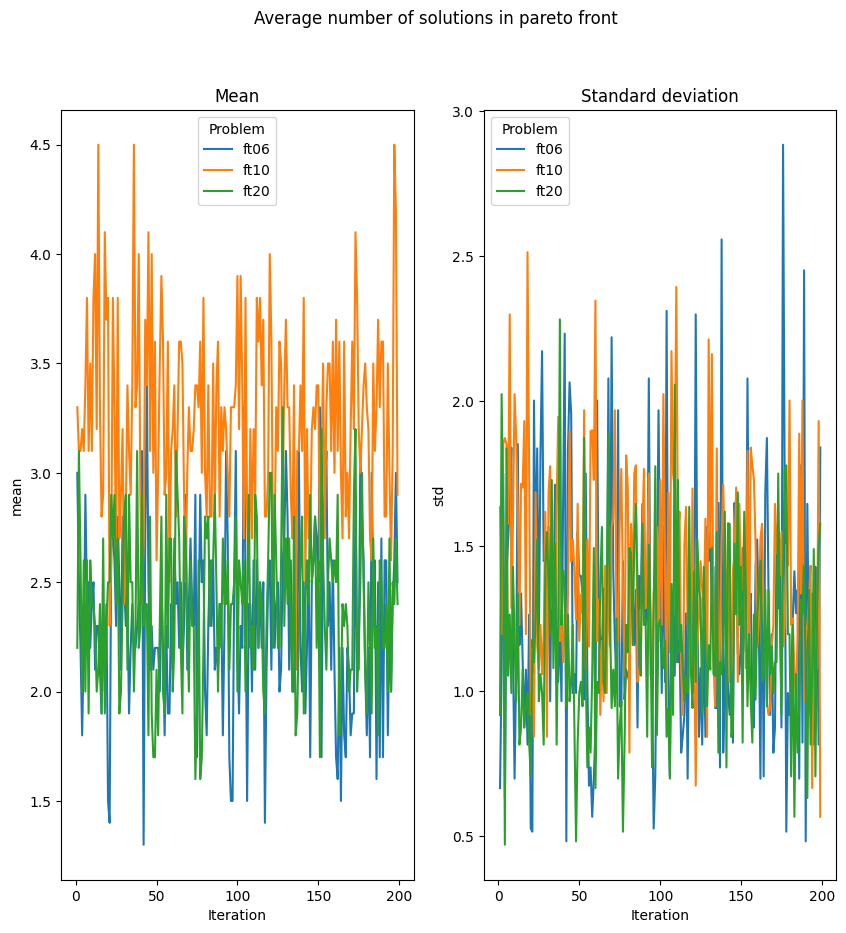

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average number of solutions in pareto front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Avg_n_solutions"))
plt.show()

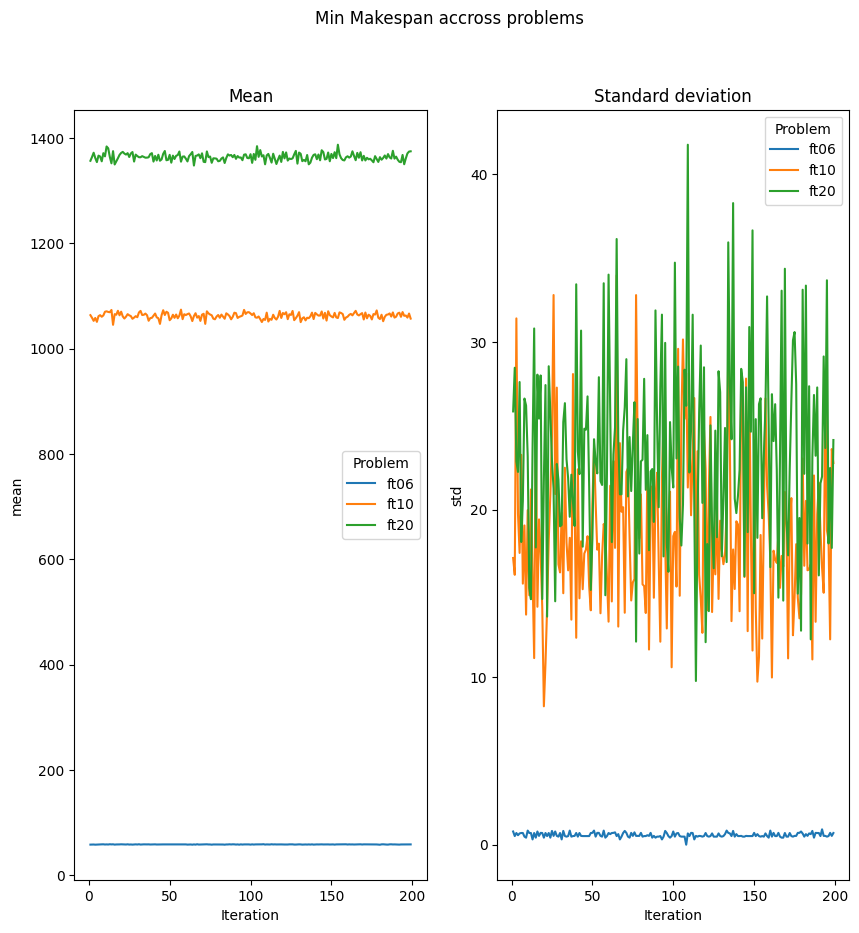

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan across problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Makespan"))
plt.show()
    

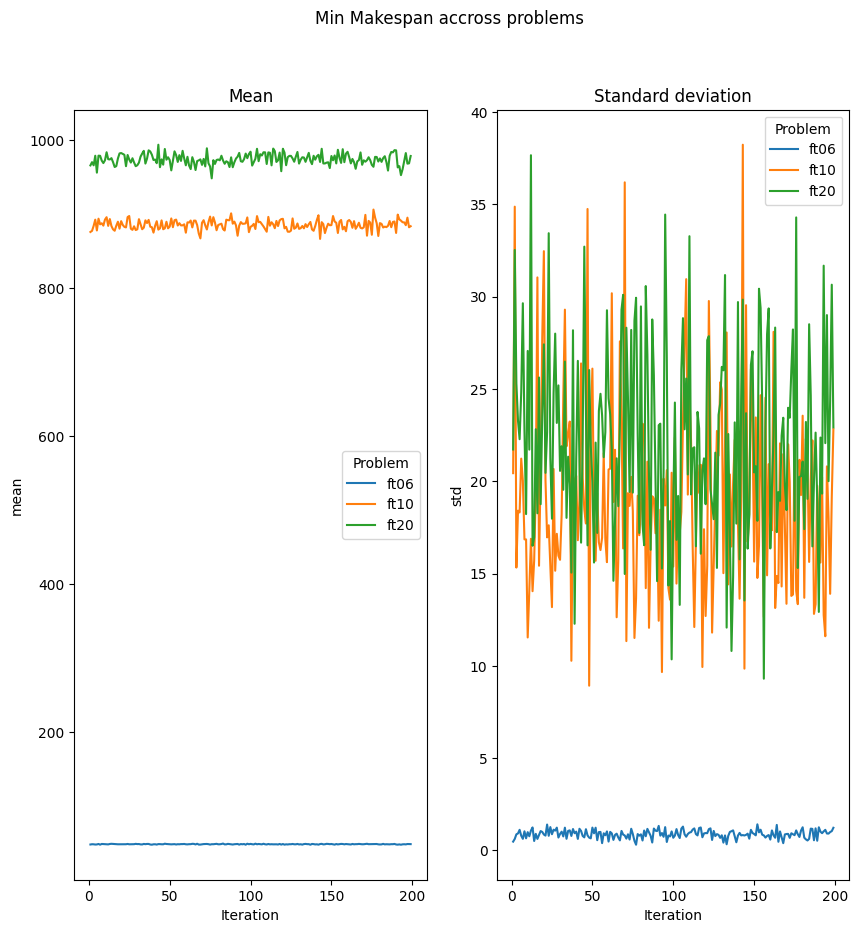

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan accross problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Mean_Flow_Time"))
plt.show()

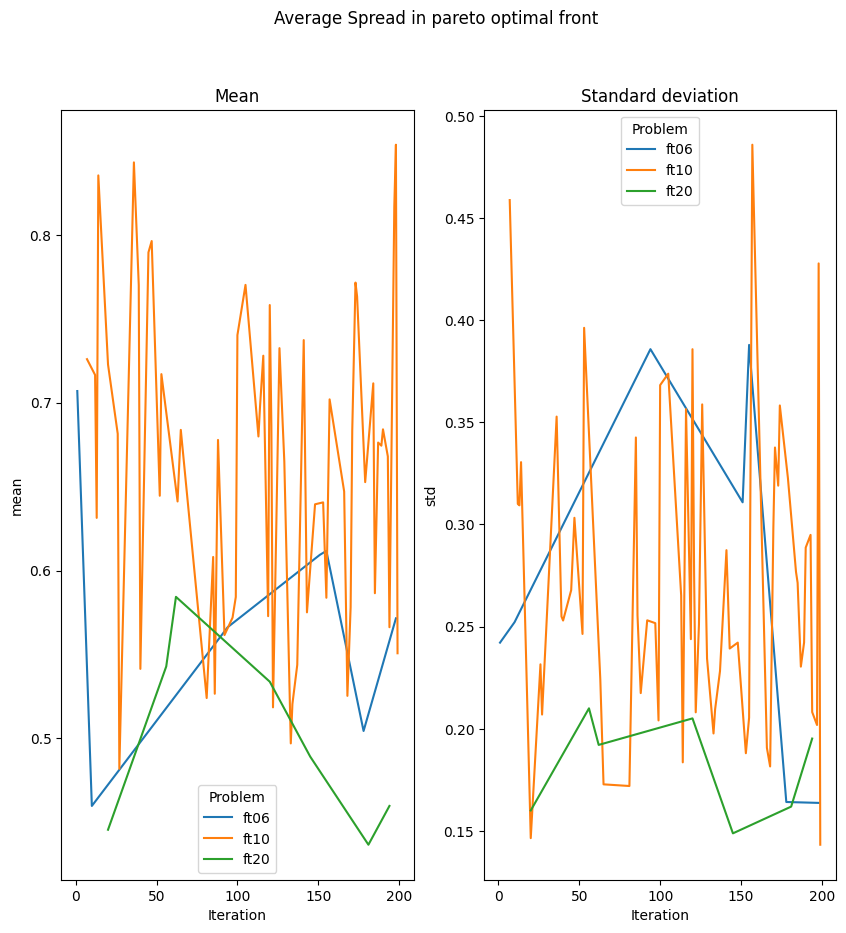

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average Spread in pareto optimal front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Spread"))
plt.show()

The average metrics for the final iterations

In [52]:
result_df = result_df.groupby(["Problem", "Candidate"]).agg({col_name : ["mean", "std"] for col_name in agg_columns})
result_df.to_csv(os.path.join(targ_dir, "result.csv"))

In [53]:
result_df

Time            Min Makespan  \
                                        mean        std         mean   
Problem Candidate                                                      
ft06    quantum_position_encoding   75.99535   0.326677         58.6   
ft10    quantum_position_encoding  251.76942  12.708049       1056.9   
ft20    quantum_position_encoding  348.99710  15.690141       1374.5   

                                             Max Makespan             \
                                         std         mean        std   
Problem Candidate                                                      
ft06    quantum_position_encoding   0.699206         64.2   7.983316   
ft10    quantum_position_encoding  22.781328       1126.0  54.982826   
ft20    quantum_position_encoding  24.148844       1411.0  40.786708   

                                  Avg Makespan            Min Mean Flow Time  \
                                          mean        std               mean   
Problem Candidate                                                              
ft06    quantum_position_encoding    60.816667   3.243655          48.766667   
ft10    quantum_position_encoding  1089.675000  23.163884         884.040000   
ft20    quantum_position_encoding  1392.333333  27.583767         978.930000   

                                             Max Mean Flow Time             \
                                         std               mean        std   
Problem Candidate                                                            
ft06    quantum_position_encoding   1.222727               64.2   7.983316   
ft10    quantum_position_encoding  22.818716             1126.0  54.982826   
ft20    quantum_position_encoding  22.917839             1411.0  40.786708   

                                  Avg Mean Flow Time               Spread  \
                                                mean        std      mean   
Problem Candidate                                                           
ft06    quantum_position_encoding          49.120278   1.467556       inf   
ft10    quantum_position_encoding         919.188333  20.782813  0.550738   
ft20    quantum_position_encoding         992.191250  32.397312       inf   

                                            N Fronts            \
                                        std     mean       std   
Problem Candidate                                                
ft06    quantum_position_encoding       NaN      8.2  1.932184   
ft10    quantum_position_encoding  0.143243     12.2  0.918937   
ft20    quantum_position_encoding       NaN     13.9  1.100505   

                                  N Non-dominated solutions            
                                                       mean       std  
Problem Candidate                                                      
ft06    quantum_position_encoding                       2.5  1.840894  
ft10    quantum_position_encoding                       2.9  0.567646  
ft20    quantum_position_encoding                       2.4  1.577621

In [54]:
test_df

,Problem,Candidate,Repetition,Iteration,Time,Min Makespan,Max Makespan,Avg Makespan,Min Mean Flow Time,Max Mean Flow Time,Avg Mean Flow Time,Spread,N Fronts,N Non-dominated solutions
0,ft06,quantum_position_encoding,0,1,0.0226,59.0,76.0,66.250000,47.500000,76.0,49.041667,0.793687,10,4
1,ft06,quantum_position_encoding,0,2,0.3937,59.0,68.0,63.500000,47.833333,68.0,48.250000,0.333333,10,2
2,ft06,quantum_position_encoding,0,3,0.7433,59.0,66.0,62.000000,48.666667,66.0,49.583333,0.830451,11,4
3,ft06,quantum_position_encoding,0,4,1.0975,58.0,59.0,58.500000,49.500000,59.0,51.333333,0.333333,10,2
4,ft06,quantum_position_encoding,0,5,1.4880,58.0,58.0,58.000000,48.166667,58.0,48.166667,inf,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,ft20,quantum_position_encoding,9,195,322.0965,1385.0,1385.0,1385.000000,1019.800000,1385.0,1019.800000,inf,12,1
5966,ft20,quantum_position_encoding,9,196,323.7450,1366.0,1373.0,1369.500000,975.900000,1373.0,1010.225000,0.333333,14,2
5967,ft20,quantum_position_encoding,9,197,325.4230,1351.0,1390.0,1373.333333,945.300000,1390.0,1010.700000,0.602451,15,3
5968,ft20,quantum_position_encoding,9,198,327.0678,1399.0,1526.0,1435.750000,1013.500000,1526.0,1028.837500,1.082161,14,4


Accessing the OR-library benchmarks

In [55]:
test_benchmark_collection = BenchmarkCollection(make_web_request=False)

In [56]:
cur_problem_names = test_df["Problem"].unique()
for p, v in test_benchmark_collection.benchmark_collection.items():
    if p in cur_problem_names:
        print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

ft06 6 x 6
ft10 10 x 10
ft20 20 x 5


In [57]:

for p, v in test_benchmark_collection.benchmark_collection.items():
    print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

abz5 10 x 10
abz6 10 x 10
abz7 20 x 15
abz8 20 x 15
abz9 20 x 15
ft06 6 x 6
ft10 10 x 10
ft20 20 x 5
la01 10 x 5
la02 10 x 5
la03 10 x 5
la04 10 x 5
la05 10 x 5
la06 15 x 5
la07 15 x 5
la08 15 x 5
la09 15 x 5
la10 15 x 5
la11 20 x 5
la12 20 x 5
la13 20 x 5
la14 20 x 5
la15 20 x 5
la16 10 x 10
la17 10 x 10
la18 10 x 10
la19 10 x 10
la20 10 x 10
la21 15 x 10
la22 15 x 10
la23 15 x 10
la24 15 x 10
la25 15 x 10
la26 20 x 10
la27 20 x 10
la28 20 x 10
la29 20 x 10
la30 20 x 10
la31 30 x 10
la32 30 x 10
la33 30 x 10
la34 30 x 10
la35 30 x 10
la36 15 x 15
la37 15 x 15
la38 15 x 15
la39 15 x 15
la40 15 x 15
orb01 10 x 10
orb02 10 x 10
orb03 10 x 10
orb04 10 x 10
orb05 10 x 10
orb06 10 x 10
orb07 10 x 10
orb08 10 x 10
orb09 10 x 10
orb10 10 x 10
swv01 20 x 10
swv02 20 x 10
swv03 20 x 10
swv04 20 x 10
swv05 20 x 10
swv06 20 x 15
swv07 20 x 15
swv08 20 x 15
swv09 20 x 15
swv10 20 x 15
swv11 50 x 10
swv12 50 x 10
swv13 50 x 10
swv14 50 x 10
swv15 50 x 10
swv16 50 x 10
swv17 50 x 10
swv18 50 x 10
sw

In [58]:
plt.cm.viridis(0.9)

(0.741388, 0.873449, 0.149561, 1.0)

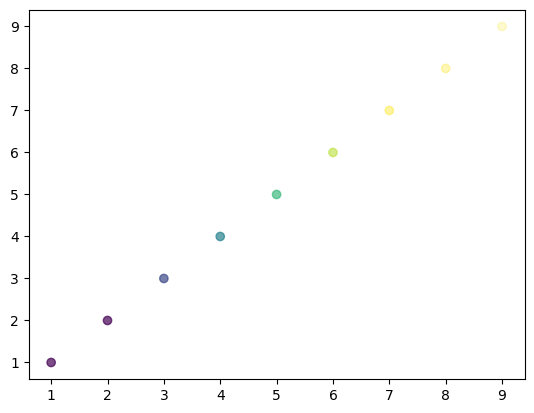

In [59]:
import matplotlib.pyplot as plt

test_x = [1,2,3,4,5,6,7,8,9]
test_y = [1,2,3,4,5,6,7,8,9]
colors = [plt.cm.viridis(((i-1)/len(test_x))*2) for i in range(len(test_x))]
for i in range(len(colors)):
    temp = list(colors[i])
    temp[-1] = np.min([1- (i-1)/(len(colors)), 0.7])
    colors[i] = temp
plt.scatter(test_x, test_y, c=colors)

In [60]:
with open("..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9", "rb") as pop_dump:
    pop_obj = pickle.load(pop_dump)

N = 50
for i, start in enumerate(pop_obj.front_start_index):
    print("New front: " + str(i))
    cur_front = pop_obj.get_front_range(i)

    end = cur_front[1]
    if end > N:
        # limit the end and length of front
        x_list = np.empty(cur_front[-1]-N)
        y_list = np.empty(cur_front[-1]-N)
        end = N
    else:
        x_list = np.empty(cur_front[-1])
        y_list = np.empty(cur_front[-1])

    for j, ind in enumerate(pop_obj.R[cur_front[0] : end]):
        x, y = ind.cur_fitness
        x_list[j] = x
        y_list[j] = y

    index_sort = x_list.argsort()
    index_sort = np.flip(index_sort)
    y_list = y_list[index_sort]
    x_list = x_list[index_sort]
    #y_list.sort()
    print(x_list, y_list)
    plt.plot(x_list, y_list)
    plt.scatter(x_list, y_list)

        
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9'